In [19]:
import tensorflow as tf
import pandas as pd
import keras
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle
tf.__version__

'2.9.1'

In [9]:
## Dataset selected and separeted by semi-colons

data = pd.read_csv("student-mat.csv", sep=";")
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [10]:
## We are going to use some of the data columns for our model
data = data[["G1", "G2", "G3","studytime","freetime","failures","absences"]]
print(data)

     G1  G2  G3  studytime  freetime  failures  absences
0     5   6   6          2         3         0         6
1     5   5   6          2         3         0         4
2     7   8  10          2         3         3        10
3    15  14  15          3         2         0         2
4     6  10  10          2         3         0         4
..   ..  ..  ..        ...       ...       ...       ...
390   9   9   9          2         5         2        11
391  14  16  16          1         4         0         3
392  10   8   7          1         5         3         3
393  11  12  10          1         4         0         0
394   8   9   9          1         2         0         5

[395 rows x 7 columns]


In [38]:
## Defining the attributes and model selection
predict = "G3"

# X axis data corresponds to all the attributes except G3
x = np.array(data.drop(predict,axis=1))

# Y axis corresponds to the predict attribute G3
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size= 0.2)


     G2  failures  G3
0     6         0   6
1     5         0   6
2     8         3  10
3    14         0  15
4    10         0  10
..   ..       ...  ..
390   9         2   9
391  16         0  16
392   8         3   7
393  12         0  10
394   9         0   9

[395 rows x 3 columns]


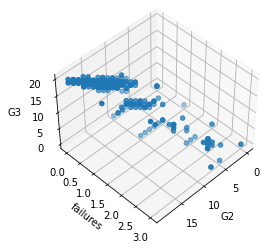

In [41]:
# Plot of the data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('G2')
ax.set_ylabel('failures')
ax.set_zlabel('G3')

data_plot = data[["G2", "failures", "G3"]]
print(data_plot)

ax.scatter(data_plot["G2"], data_plot["failures"], data_plot["G3"])
ax.view_init(45,45)

#for G1, failures, G3 in data_plot:
    

In [39]:
# Linear Regression method applied

# Declaring the model
linear = linear_model.LinearRegression()

# Applying the data to the model in order to find the best fit line
linear.fit(x_train, y_train)

# Testing the model and obtaining it´s accuracy
acc = linear.score(x_test, y_test)
print('accuracy: ', acc)

# Constants obtained with the method
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

accuracy:  0.8596759814078434
Coefficient: 
 [ 0.1781522   0.95416493 -0.17439813  0.14951967 -0.32844448  0.03945021]
Intercept: 
 -1.9483475870158102


In [ ]:
# Saving the model into a file 
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [ ]:
# Getting each prediction from the model andout data
predictions = linear.predict(x_test)

for i in range(len(predictions)):
    print(predictions[i], x_test[i], y_test[i])